In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
%cd drive
%cd MyDrive
%cd 'Data Science Group Project - Big Data Course'

c1 = pd.read_csv('completed_matches.csv').drop('Unnamed: 0', axis=1).convert_dtypes() # completed_matches
u1 = pd.read_csv('upcoming_matches.csv').drop('Unnamed: 0', axis=1).convert_dtypes() # upcoming matches
p1 = pd.read_csv('players.csv').drop('Unnamed: 0', axis=1).convert_dtypes() # players

print(c1.shape)
print(p1.shape)
print(u1.shape)

c = c1.copy()
u = u1.copy()
p = p1.copy()


Mounted at /content/drive
/content/drive
/content/drive/MyDrive
/content/drive/MyDrive/Data Science Group Project - Big Data Course
(6891, 78)
(2334, 22)
(60, 24)


In [3]:
def clean_c(df):

  print('Data cleaning. Starting shape:', df.shape)

  # Counting nan values in all fields
  print('Fill NAs with median of dimension')
  print([(x, y) for x, y in zip(df.isna().sum(), df.isna().sum().index) if x > 0])
  # Fill NAs with the median value of each column
  median_values = df.select_dtypes(include=['int64', 'float64']).median()
  df = df.fillna(median_values)
  print(df.shape)

  print('Remove events befor 2013 for relevance')
  df = df.loc[(df.event_year >= 2013)]

  return df


In [4]:
df = clean_c(c)

Data cleaning. Starting shape: (6891, 78)
Fill NAs with median of dimension
[(12, 'height_diff'), (9, 'weight_diff'), (1035, 'reach_diff'), (195, 'age_diff')]
(6891, 78)
Remove events befor 2013 for relevance


In [5]:
# Group the dataframe by the boolean column
grouped = df.groupby('win')

# Define the sample size for each group
sample_size = 500

# Initialize an empty dataframe to store the samples
samples = pd.DataFrame()

# Loop over each group
for group_name, group_data in grouped:
    # If the group has enough rows, sample the required number of rows
    if len(group_data) >= sample_size:
        group_sample = group_data.sample(sample_size)
    # If the group has fewer rows than the required sample size, sample all rows
    else:
        group_sample = group_data.sample(len(group_data))
    # Append the group sample to the overall samples dataframe
    samples = samples.append(group_sample)

# Reset the index of the samples dataframe
samples = samples.reset_index(drop=True)
print(samples.shape)
samples.head()

(1000, 78)


<ipython-input-5-a6cf510a9b95>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples = samples.append(group_sample)
<ipython-input-5-a6cf510a9b95>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  samples = samples.append(group_sample)


,player_1_name,player_2_name,weight_class,win,duration,kd,o_kd,ss_hit,ss_att,o_ss_hit,...,age_diff,ss_diff,ss_acc_diff,ss_abs_diff,ss_def_diff,td_diff,td_acc_diff,td_def_diff,sub_diff,prev_diff
0,Roxanne Modafferi,Casey O'Neill,Flyweight,0,15,0,0,120,358,229,...,-15,5.3,0.27,-1.02,0.06,1.24,0.21,0.3,0.9,3
1,Nicholas Musoke,Bojan Velickovic,Welterweight,0,15,0,1,49,173,53,...,-2,-1.38,-0.01,-1.49,0.0,-0.49,0.06,-0.27,0.3,0
2,Karl Roberson,Marvin Vettori,Middleweight,0,15,0,0,4,16,45,...,-3,1.63,-0.07,1.16,0.02,1.17,0.04,0.32,0.1,1
3,Wellington Turman,Bruno Silva,Middleweight,0,15,0,0,1,1,19,...,7,1.39,-0.01,0.79,0.0,-1.13,-0.03,0.21,-1.0,-1
4,Nik Lentz,Movsar Evloev,Featherweight,0,15,0,0,46,127,82,...,10,-0.92,0.01,0.46,-0.13,-1.53,-0.18,-0.28,0.9,-3


In [6]:
from sklearn.feature_selection import VarianceThreshold
X = samples.drop(['player_1_name', 'player_2_name', 'weight_class', 
                  'player_1_url', 'player_2_url', 'match_url', 'event_date', 'event_month',
                  'win'], axis=1)
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
selector.fit_transform(X)
selector.get_support(indices=True)
# keep_indices = selector.get_support(indices=True)
# samples_high_var = samples.iloc[:, keep_indices]
# samples_high_var.head()

array([ 0,  1,  2,  3,  4,  5,  6,  9, 10, 11, 12, 13, 14, 15, 16, 19, 20,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 62, 64, 67, 68])

Selected best 10:
Index(['kd', 'o_kd', 'td_perc', 'o_td_perc', 'sub_att', 'ctrl',
       'ss_ground_hit', 'ss_ground_att', 'o_ss_ground_hit', 'o_ss_ground_att'],
      dtype='object')


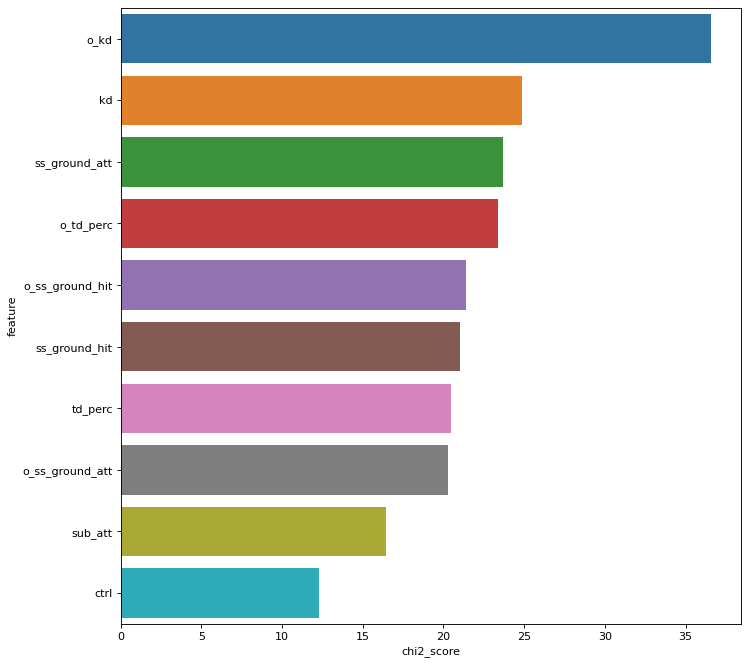

In [ ]:
# Select K Best based on Chi-squared

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X = samples.drop(['player_1_name', 'player_2_name', 'weight_class', 
                  'player_1_url', 'player_2_url', 'match_url', 'event_date', 'event_month',
                  'win'], axis=1)

transformed = MinMaxScaler().fit_transform(X)
transformed_df = pd.DataFrame(transformed, columns=X.columns)

y = samples['win']

chi2_features = SelectKBest(chi2, k = 10)
X_kbest_features = chi2_features.fit_transform(transformed_df, y)

filter = chi2_features.get_support()
features = X.columns

print("Selected best 10:")
print(features[filter])

chi2_df = pd.DataFrame(list(zip(chi2_features.feature_names_in_, chi2_features.scores_)))\
                      .rename(columns={0:'feature', 1:'chi2_score'})\
                      .sort_values('chi2_score', ascending=False)

plt.figure(figsize=(10, 10), dpi=80)

sns.barplot(data=chi2_df.head(10), x='chi2_score', y='feature')
plt.show()


In [ ]:
# mutual_info_classif()
from sklearn.feature_selection import mutual_info_classif

X = samples.drop('win', axis=1)
X = X.drop(df.select_dtypes(include=['string']), axis=1)

y = samples['win']

scores = X.apply(lambda col: mutual_info_classif(col.values.reshape(-1,1), y), axis=0)

scores.transpose().sort_values(by=0, ascending=False)

,0
o_ss_ground_hit,0.088575
ss_perc,0.087098
kd,0.075329
o_kd,0.074561
o_ss_ground_att,0.072470
...,...
o_ss_head_att,0.000000
o_rev,0.000000
rev,0.000000
td_perc,0.000000


You can use mutual_info_classif() when you have a classification problem and want to select the most informative features for your model. It is particularly useful when you have a large number of features and want to identify the ones that are most relevant for predicting the target variable.